In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from pathlib import Path
import numpy as np
import datetime
import glob

Load Data

In [2]:
dummy_date = "2000-01-01" # Dummy date to synchronize time axes (since only H:M:S is needed)

project_path = r"C:\Users\232078\OneDrive - Weir Group PLC\Documents\India_test_data\Cyclone Lab Data 20260211"

LS_data = os.listdir(os.path.join(project_path, "LS"))

HS_data = os.listdir(os.path.join(project_path, "HS"))

LS_data, HS_data

(['AnalogCMv00.SYN0901019FC1_LSDataLogger_20260211T073820+804.csv',
  'AnalogCMv00.SYN0901019FC1_LSDataLogger_20260211T094421+604.csv',
  'AnalogCMv00.SYN0901019FC1_LSDataLogger_20260211T115022+404.csv'],
 ['RawHS.SYN0901019FC1_Fs4000_T300_20260211T122239.csv',
  'RawHS.SYN0901019FC1_Fs4000_T300_20260211T124232.csv'])

Concatentate LS_data into one long day

In [3]:
LS_data_continuous = LS_data[:5] # take only the first 5 files, since they are continuous. The rest are separate tests

cols = ["Timestamp", "CL01Flow", "CL01Pressure", "CL01Density"]

dfs = []
for file in LS_data_continuous:
    df = pd.read_csv(Path(project_path) / "LS" / file, usecols=cols)
    dfs.append(df)

LS_whole_day_df = pd.concat(dfs, ignore_index=True)


# Extract hh:mm:ss from "Timestamp"
LS_whole_day_df["Timestamp"] = (
    LS_whole_day_df["Timestamp"]
    .astype(str)
    .str.extract(r"T(\d{6})", expand=False)
)


# convert to datetime.time only if not already in that format
if not isinstance(LS_whole_day_df["Timestamp"].iloc[0], datetime.time):
    LS_whole_day_df["Timestamp"] = pd.to_datetime(LS_whole_day_df["Timestamp"].astype(str).str.zfill(6), format="%H%M%S").dt.time

LS_whole_day_df


,Timestamp,CL01Pressure,CL01Flow,CL01Density
0,07:38:23,7.397687,0.175787,0.000000
1,07:38:25,7.397687,0.076907,0.000000
2,07:38:27,7.397687,0.120853,0.000000
3,07:38:29,7.397687,0.208747,0.000000
4,07:38:31,7.177953,0.131840,0.000000
...,...,...,...,...
9833,13:22:34,24.829859,30.498978,1119.563128
9834,13:22:36,25.415815,29.894711,1119.869228
9835,13:22:38,25.928526,26.433912,1122.930235
9836,13:22:40,25.635548,27.521592,1124.460738


In [4]:
print(LS_whole_day_df["Timestamp"].dtype)

# LS_whole_day_df["Timestamp"] = LS_whole_day_df["Timestamp"].astype(str).str.strip()

result = LS_whole_day_df[LS_whole_day_df["Timestamp"] == f"{dummy_date} 10:14:07"]
result

object


,Timestamp,CL01Pressure,CL01Flow,CL01Density


# Plotting HS and LS data

C:\Users\232078\AppData\Local\Temp\ipykernel_6016\257233317.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  LS_whole_day_df['Timestamp'] = pd.to_datetime(LS_whole_day_df['Timestamp'])


Plotting RawHS.SYN0901019FC1_Fs4000_T300_20260211T122239.csv with start time 122239 (HS time axis: 2000-01-01 12:22:39 to 2000-01-01 12:27:39)
Length of RawHS.SYN0901019FC1_Fs4000_T300_20260211T122239.csv data: 1200000 points
Plotting RawHS.SYN0901019FC1_Fs4000_T300_20260211T124232.csv with start time 124232 (HS time axis: 2000-01-01 12:42:32 to 2000-01-01 12:47:32)
Length of RawHS.SYN0901019FC1_Fs4000_T300_20260211T124232.csv data: 1200000 points


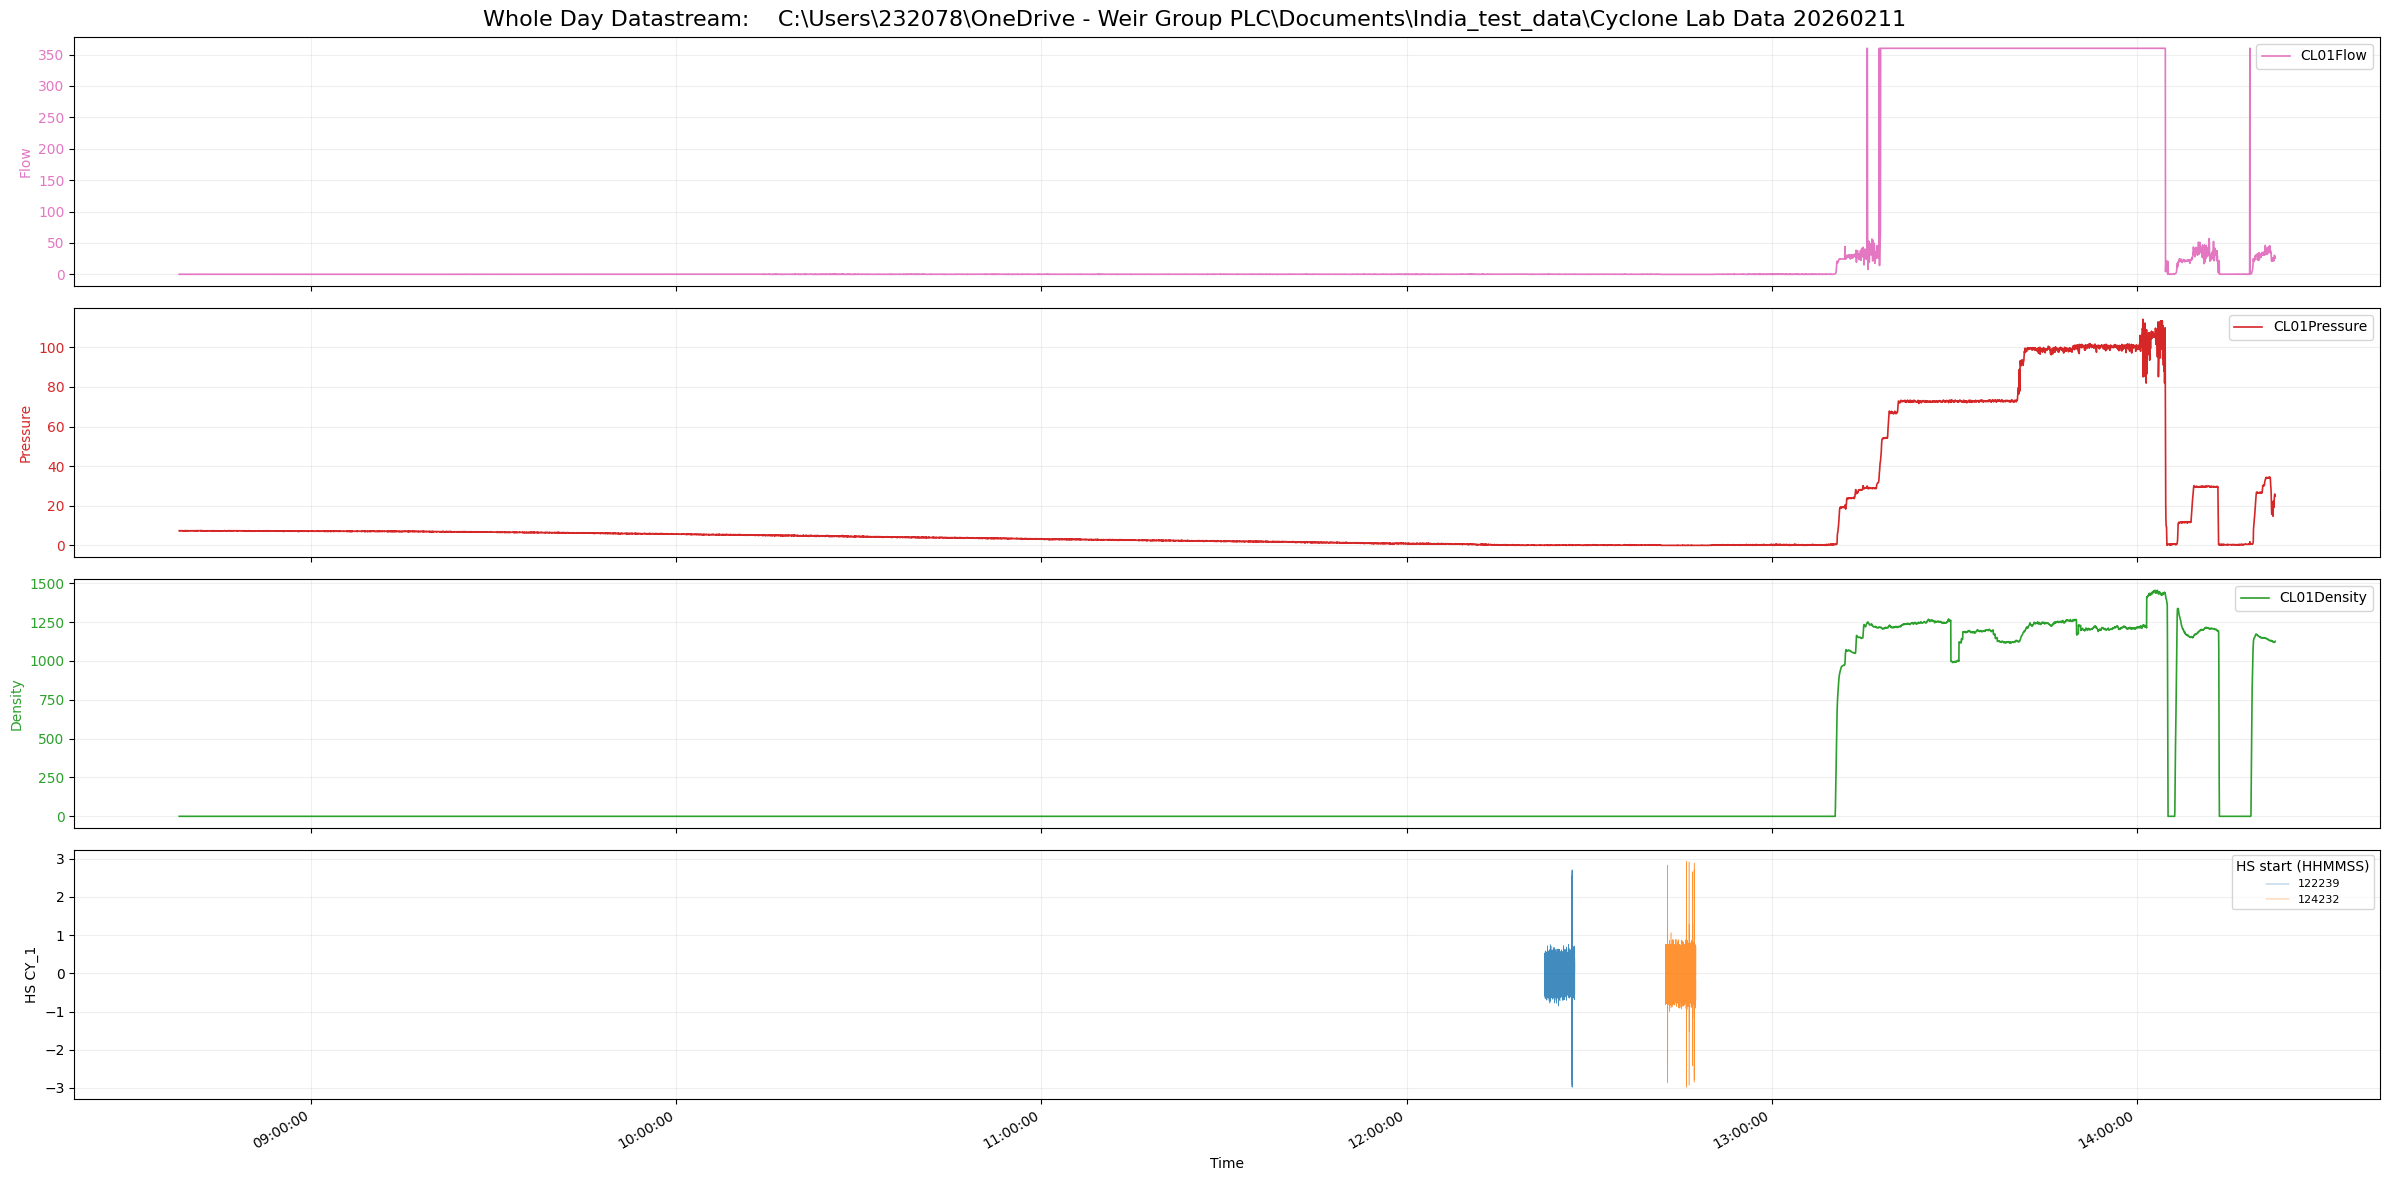

In [8]:
# --- Inputs ---
hs_folder = rf"{project_path}\HS"       # folder containing HS csv files
dummy_date = "2000-01-01"
T_minutes = 5                           # filename contains _T300 (300 seconds)

# --- LS timestamp prep ---
LS_whole_day_df['Timestamp'] = LS_whole_day_df['Timestamp'].astype(str)
LS_whole_day_df['Timestamp'] = dummy_date + " " + LS_whole_day_df['Timestamp']
LS_whole_day_df['Timestamp'] = pd.to_datetime(LS_whole_day_df['Timestamp'])

# LS_start_time = LS_whole_day_df["Timestamp"].iloc[0]
# LS_end_time   = LS_whole_day_df["Timestamp"].iloc[-1]

LS_time_axis  = LS_whole_day_df["Timestamp"]

# --- Collect HS files ---
hs_files = sorted(glob.glob(os.path.join(hs_folder, "RawHS*.csv")))

# --- Plot: 4 panels, shared X ---
fig, axes = plt.subplots(
    nrows=4, ncols=1,
    figsize=(24, 12),
    sharex=True,
    gridspec_kw={"height_ratios": [1, 1, 1, 1]}
)

ax_flow, ax_press, ax_dens, ax_hs = axes

# ---- Panel 1: Flow ----
ax_flow.plot(LS_time_axis, LS_whole_day_df["CL01Flow"],
             linewidth=1.2, color="tab:pink", label="CL01Flow")
ax_flow.set_ylabel("Flow", color="tab:pink")
ax_flow.tick_params(axis="y", labelcolor="tab:pink")
ax_flow.grid(True, alpha=0.2)
ax_flow.legend(loc="upper right")

# ---- Panel 2: Pressure ----
ax_press.plot(LS_time_axis, LS_whole_day_df["CL01Pressure"],
              linewidth=1.2, color="tab:red", label="CL01Pressure")
ax_press.set_ylabel("Pressure", color="tab:red")
ax_press.tick_params(axis="y", labelcolor="tab:red")
ax_press.grid(True, alpha=0.2)
ax_press.legend(loc="upper right")

# ---- Panel 3: Density ----
ax_dens.plot(LS_time_axis, LS_whole_day_df["CL01Density"],
             linewidth=1.2, color="tab:green", label="CL01Density")
ax_dens.set_ylabel("Density", color="tab:green")
ax_dens.tick_params(axis="y", labelcolor="tab:green")
ax_dens.grid(True, alpha=0.2)
ax_dens.legend(loc="upper right")

# ---- Panel 4: HS concentration (each file overlaid) ----
for hs_file_path in hs_files:
    hs_file = os.path.basename(hs_file_path)
    HS_df = pd.read_csv(hs_file_path)

    cols = [c for c in HS_df.columns if c.startswith("CY_1_T+")]
    if not cols:
        print(f"Skipping {hs_file}: no CY_1_T+ columns found")
        continue

    HS_df_conc = HS_df[cols].stack().reset_index(drop=True).to_frame("CY_1")

    # Parse start time from filename: ..._T300_YYYYMMDDTHHMMSS.csv
    try:
        hhmmss = hs_file.split("_T300")[1].split("T")[1][:6]
    except Exception:
        print(f"Skipping {hs_file}: couldn't parse time from filename")
        continue



    hs_start_time = pd.to_datetime(hhmmss, format="%H%M%S").replace(year=2000, month=1, day=1)
    hs_end_time   = hs_start_time + pd.Timedelta(minutes=T_minutes)

    hs_time_axis = pd.date_range(start=hs_start_time, end=hs_end_time,
                                 periods=HS_df_conc.shape[0])

    print(f"Plotting {hs_file} with start time {hhmmss} (HS time axis: {hs_time_axis[0]} to {hs_time_axis[-1]})")
    print(f"Length of {hs_file} data: {len(HS_df_conc)} points")


    cy1 = HS_df_conc["CY_1"].where(HS_df_conc["CY_1"].between(-3, 3)) # filter out knocks to vibration sensor (spikes outside -3 to 3 range)

    ax_hs.plot(hs_time_axis, cy1,
               linewidth=0.35, alpha=0.85, label=hhmmss)

ax_hs.set_ylabel("HS CY_1")
ax_hs.set_xlabel("Time")
ax_hs.grid(True, alpha=0.2)

# Make HS legend manageable
if len(hs_files) <= 12:
    ax_hs.legend(title="HS start (HHMMSS)", loc="upper right", fontsize=8)

ax_hs.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
fig.autofmt_xdate()

fig.suptitle(f"Whole Day Datastream:    {project_path}", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\232078\AppData\Local\Temp\ipykernel_6016\3080842625.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  LS_whole_day_df['Timestamp'] = pd.to_datetime(LS_whole_day_df['Timestamp'])


Plotting RawHS.SYN0901019FC1_Fs4000_T300_20260211T122239.csv with start time 122239 (HS time axis: 2000-01-01 12:22:39 to 2000-01-01 12:27:39)
Plotting RawHS.SYN0901019FC1_Fs4000_T300_20260211T124232.csv with start time 124232 (HS time axis: 2000-01-01 12:42:32 to 2000-01-01 12:47:32)


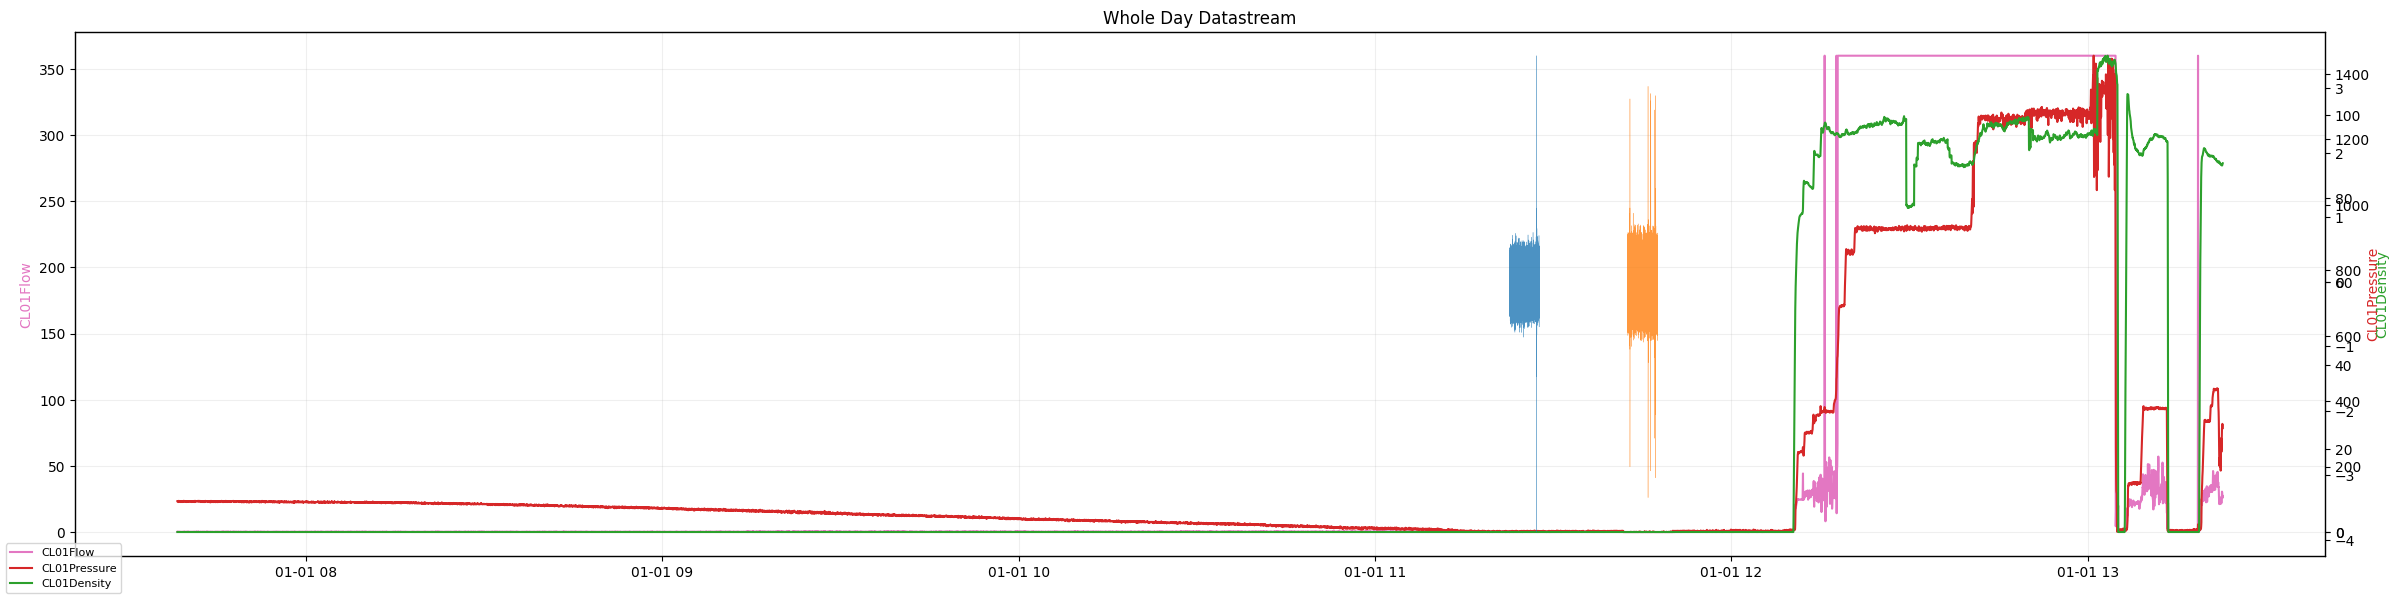

In [6]:
# --- Inputs ---
hs_folder = rf"{project_path}\HS"       # folder containing HS csv files
dummy_date = "2000-01-01"              # already used in your LS code
T_minutes = 5                          # because filename contains _T300 (300 seconds)

# --- LS timestamp prep (same as you did) ---
LS_whole_day_df['Timestamp'] = LS_whole_day_df['Timestamp'].astype(str)
LS_whole_day_df['Timestamp'] = dummy_date + " " + LS_whole_day_df['Timestamp']
LS_whole_day_df['Timestamp'] = pd.to_datetime(LS_whole_day_df['Timestamp'])

# LS_start_time = LS_whole_day_df["Timestamp"].iloc[0]
# LS_end_time   = LS_whole_day_df["Timestamp"].iloc[-1]

LS_time_axis  = LS_whole_day_df["Timestamp"]

# --- Collect HS files ---
hs_files = sorted(glob.glob(os.path.join(hs_folder, "RawHS*.csv")))

# --- Plot ---
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(LS_time_axis, LS_whole_day_df['CL01Flow'], linewidth=1.5, color="tab:pink", label="CL01Flow")
ax.set_ylabel("CL01Flow", color="tab:pink")

ax2 = ax.twinx()
ax2.plot(LS_time_axis, LS_whole_day_df['CL01Pressure'], linewidth=1.5, color="tab:red", label="CL01Pressure")
ax2.set_ylabel("CL01Pressure", color="tab:red")

ax3 = ax.twinx()
ax3.plot(LS_time_axis, LS_whole_day_df['CL01Density'], linewidth=1.5, color="tab:green", label="CL01Density")
ax3.set_ylabel("CL01Density", color="tab:green")


ax4 = ax.twinx()
for hs_file_path in hs_files:
    hs_file = os.path.basename(hs_file_path)

    HS_df = pd.read_csv(hs_file_path)

    cols = [c for c in HS_df.columns if c.startswith("CY_1_T+")]
    if not cols:
        print(f"Skipping {hs_file}: no CY_1_T+ columns found")
        continue

    HS_df_conc = HS_df[cols].stack().reset_index(drop=True).to_frame("CY_1")

    # Parse start time from filename: ..._T300_YYYYMMDDTHHMMSS.csv
    # You used: HS_file.split("_T300")[1].split("T")[1][:6]
    # We'll keep your approach but make it a touch safer:
    try:
        hhmmss = hs_file.split("_T300")[1].split("T")[1][:6]
    except Exception:
        print(f"Skipping {hs_file}: couldn't parse time from filename")
        continue

    hs_start_time = pd.to_datetime(hhmmss, format="%H%M%S").replace(year=2000, month=1, day=1)
    hs_end_time   = hs_start_time + pd.Timedelta(minutes=T_minutes)

    hs_time_axis = pd.date_range(start=hs_start_time, end=hs_end_time, periods=HS_df_conc.shape[0])

    print(f"Plotting {hs_file} with start time {hhmmss} (HS time axis: {hs_time_axis[0]} to {hs_time_axis[-1]})")

    # Plot each file; label with HH:MM:SS so legend is readable
    ax4.plot(hs_time_axis, HS_df_conc["CY_1"], linewidth=0.25, alpha=0.8, label=hhmmss)

# # Make legend manageable (7 files is fine)
# ax4.legend(title="HS start (HHMMSS)", loc="lower left", fontsize=8)

# ---- Combined legend across axes ----
axes = [ax, ax2, ax3]
handles, labels = [], []
for a in axes:
    h, l = a.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)


fig.legend(handles, labels, loc="lower left", fontsize=8, frameon=True)


ax.set_title("Whole Day Datastream")
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

Debugging Single HS file if needed

In [7]:
HS_file = "RawHS.SYN0901019FC1_Fs4000_T300_20260209T164506.csv"

HS_df = pd.read_csv(rf"{project_path}\HS\{HS_file}")

cols = [c for c in HS_df.columns if c.startswith("CY_1_T+")]

# Stack into one column (drops the column labels automatically)
HS_df_conc = HS_df[cols].stack().reset_index(drop=True).to_frame("CY_1")




LS_whole_day_df['Timestamp'] = LS_whole_day_df['Timestamp'].astype(str)

LS_whole_day_df['Timestamp'] = dummy_date + " " + LS_whole_day_df['Timestamp']

LS_whole_day_df['Timestamp'] = pd.to_datetime(LS_whole_day_df['Timestamp'])

LS_start_time = LS_whole_day_df["Timestamp"].iloc[0]  # Get the first timestamp as the start time
LS_end_time = LS_whole_day_df["Timestamp"].iloc[-1]  # Get the last timestamp as the end time



hs_start_time = HS_file.split("_T300")[1].split("T")[1][:6]
hs_start_time = pd.to_datetime(hs_start_time, format="%H%M%S")
hs_start_time = hs_start_time.replace(year=2000, month=1, day=1) # dummy date to synchronize with LS data

hs_end_time = hs_start_time + pd.Timedelta(minutes=5)



print(LS_start_time) #2000-01-01 08:54:54
print(LS_end_time) #2000-01-01 18:13:46

print(hs_start_time) #2000-01-01 18:04:02
print(hs_end_time) #2000-01-01 18:09:02


# LS_time_axis = LS_whole_day_df["Timestamp"].dt.tz_localize(None)  # Remove timezone if present
hs_time_axis = pd.date_range(start=hs_start_time, end=hs_end_time, periods=HS_df_conc.shape[0])


fig, ax = plt.subplots(figsize=(24, 6))
# ax.plot(LS_time_axis, LS_whole_day_df['CL01Flow'], linewidth=0.25)

ax2 = ax.twinx()
ax2.plot(hs_time_axis, HS_df_conc['CY_1'], linewidth=0.25)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\232078\\OneDrive - Weir Group PLC\\Documents\\India_test_data\\Cyclone Lab Data 20260211\\HS\\RawHS.SYN0901019FC1_Fs4000_T300_20260209T164506.csv'